In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
import matplotlib.pyplot as plt
np.random.seed(7)

Using TensorFlow backend.


In [3]:
# Importing the training set
data = pd.read_excel("PerformanceGraphExport.xls")
cl = data['S&P 500'][:2538].values

In [4]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

In [9]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
lb = 45
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1993, 45)
(499, 45)
(1993,)
(499,)


In [8]:
#Build the model
model = Sequential()
print (X_train.shape)
model.add(Conv1D(32, 3, padding='same', input_shape =X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv1D(32, 3, padding='same', input_shape =X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(64, 3, padding='same', input_shape =X_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(Conv1D(64, 3, padding='same', input_shape =X_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(256,return_sequences = False, input_shape = X_train.shape[1:]))
#model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 


(1993, 45)


ValueError: Input 0 is incompatible with layer conv1d_2: expected ndim=3, found ndim=2

In [47]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)

Train on 1993 samples, validate on 499 samples
Epoch 1/100
1993/1993 [==============================] - 2s 1ms/step - loss: 0.0011 - val_loss: 0.0070

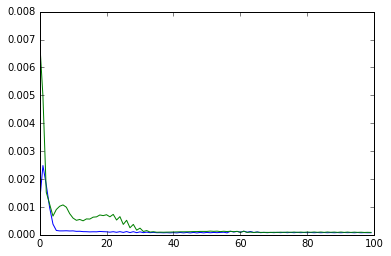

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

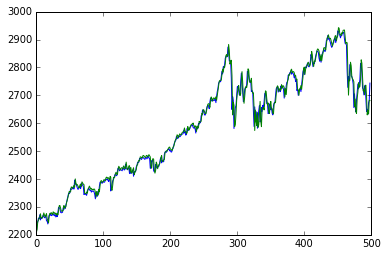

In [49]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))
plt.show()

In [52]:
model.save("C-RNN-Model.hdf5")
